# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [3]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)


# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [6]:
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [7]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [17]:
print('unique values of city', temp['City'].unique())
print('unique values of state', temp['State'].unique())
temp.describe().T
# Tiene tres columnas; city, state y temperature. Es decir, define a tempoeratura por ciudad y te dice el estado al que pertence.
#los estados que contiene son nueva york. connecticut y New Jersey. La tempereatura maxiam es 22 grados y la minima 3, 
#teniendo una media de 15.15 grads

unique values of city ['NYC' 'Albany' 'Buffalo' 'Hartford' 'Bridgeport' 'Treton' 'Newark']
unique values of state ['New York' 'Connecticut' 'New Jersey']


,count,mean,std,min,25%,50%,75%,max
Temperature,7.0,15.15873,6.695265,3.333333,11.944444,17.222222,19.722222,22.222222


#### Select the rows where state is New York

In [19]:
temp[temp.State == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [21]:
temp.Temperature[temp.State == 'New York'].mean()


10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [25]:
temp[temp.Temperature > 15].drop(["Temperature"], axis=1)


,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [27]:
temp[temp.Temperature > 15].drop(["State","Temperature"], axis=1)

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [30]:
temp[(temp.Temperature > 15) & (temp.Temperature <20)].drop(["State","Temperature"], axis=1)


,City
0,NYC
3,Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [31]:
temp.groupby(["State"]).mean()

,Temperature
State,
Connecticut,15.833333
New Jersey,21.111111
New York,10.740741


In [33]:
temp.groupby(["State"]).std()

,Temperature
State,
Connecticut,1.964186
New Jersey,1.571348
New York,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [34]:
employee = pd.read_csv('employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [38]:
print(employee.dtypes)
employee
# TIene6 columnas ,de las cuales solo dos son numericas enteras, Years y Salary. El archivo indica el nombre del emplead
# el departamento al que pertenece, el nivel de educacion que ha obtenido, su genero y el Rol al que pertence.

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

<AxesSubplot:xlabel='Salary', ylabel='Count'>

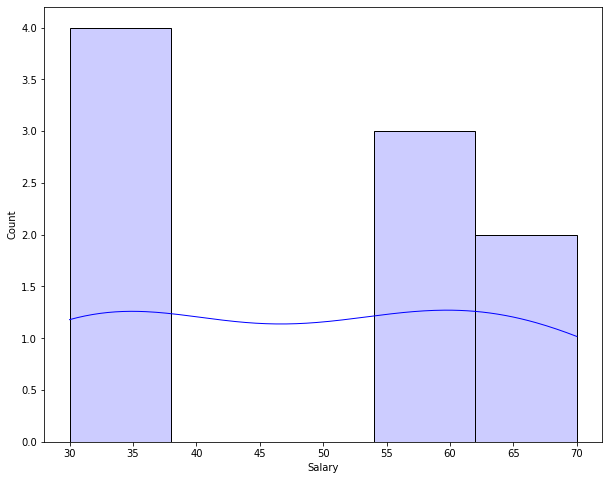

In [55]:
# vamos a ver visualmente como está distribuida la variable respuesta

sns.histplot(
        data = employee,
        x = 'Salary',
        kde = True, 
        color = 'blue', 
        line_kws = {"linewidth": 1}, 
        alpha = 0.2)

# no hay muchos valores en el valor medio pero si en los extremos 

#### What's the average salary in this company?

In [39]:
employee["Salary"].mean()

48.888888888888886

#### What's the highest salary?

In [40]:
employee["Salary"].max()

70

#### What's the lowest salary?

In [41]:
employee["Salary"].min()

30

#### Who are the employees with the lowest salary?

In [42]:
employee[employee.Salary == employee["Salary"].min()]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [56]:
employee[employee.Name == 'David']


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [57]:
employee[employee.Name == 'David'].Salary


2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [58]:
employee[employee.Title == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [60]:
employee.head(3)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [63]:
employee.iloc[[0,1,2]]


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [64]:
employee[(employee.Title == 'associate')&(employee.Salary>55)]


,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [65]:
employee.groupby(["Years"]).mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [66]:
employee.groupby(["Title"]).mean()

,Years,Salary
Title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

In [26]:
# draw boxplot here

In [27]:
# print first quartile here

In [28]:
# print third quartile here

#### Is the mean salary per gender different?

In [29]:
# your answer here

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [30]:
# your answer here

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [4]:
orders = pd.read_csv('Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [70]:
orders.size

5570936

In [75]:
orders.head(2)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [71]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [74]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,397924.0,278465.221859,152771.368303,0.0,148333.75,284907.50,410079.25,541908.00
InvoiceNo,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


In [ ]:
# hay unos 400k de registros donde la cantidad y el unitprice estan bastantes dispersos debido a la separacion de 
# la media y la mediana. 

el documento tiene unas 557.000 rows 

####  What is the average Purchase Price?

In [5]:
orders.UnitPrice.mean()

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [7]:
orders.UnitPrice.min()

0.0

In [6]:
orders.UnitPrice.max()

8142.75

#### Select all the customers we have in Spain

In [11]:
orders[orders.Country == 'Spain'].CustomerID.unique()

array([12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502,
       12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417,
       12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544,
       12538, 12445, 12442])

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [12]:
len(orders[orders.Country == 'Spain'].CustomerID.unique())

30

#### Select all the customers who have bought more than 50 items ?

In [20]:
customers50 = orders[orders.Quantity >= 50].CustomerID.unique()
print('el numero de customer es:' ,len(customers50),'. Y son: ', customers50)

el numero de customer es: 1368 . Y son:  [13748 15291 14688 ... 15877 13298 16446]


#### Select orders from Spain that are above 50 items

In [22]:
orders[(orders.Country == 'Spain') & (orders.Quantity >= 50)].CustomerID.unique()

array([12557, 12507, 12484, 12546, 12454, 12596, 12597])

#### Select all free orders

In [29]:
free_orders = orders[orders.UnitPrice == 0.0]
free_orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [36]:
df= orders.copy()
df = df.loc[df.iloc[:,7].str.contains(r'(lunch)')]

df

/var/folders/2_/bnd0fncj143gc6x61sb7k8mc0000gn/T/ipykernel_3494/1949410309.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df.loc[df.iloc[:,7].str.contains(r'(lunch)')]


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
35,35,536370,22629,2010,12,3,8,spaceboy lunch box,24,2010-12-01 08:45:00,1.95,12583,France,46.80
36,36,536370,22659,2010,12,3,8,lunch box i love london,24,2010-12-01 08:45:00,1.95,12583,France,46.80
37,37,536370,22631,2010,12,3,8,circus parade lunch box,24,2010-12-01 08:45:00,1.95,12583,France,46.80
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
94,94,536378,21559,2010,12,3,9,strawberry lunch box with cutlery,6,2010-12-01 09:37:00,2.55,14688,United Kingdom,15.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50
397880,541865,581583,20725,2011,12,5,12,lunch bag red retrospot,40,2011-12-09 12:23:00,1.45,13777,United Kingdom,58.00
397909,541894,581587,22631,2011,12,5,12,circus parade lunch box,12,2011-12-09 12:50:00,1.95,12680,France,23.40


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [38]:
df[df.year == 2011]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26440,42779,540021,22630,2011,1,2,12,dolly girl lunch box,1,2011-01-04 12:51:00,1.95,17841,United Kingdom,1.95
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50
397880,541865,581583,20725,2011,12,5,12,lunch bag red retrospot,40,2011-12-09 12:23:00,1.45,13777,United Kingdom,58.00
397909,541894,581587,22631,2011,12,5,12,circus parade lunch box,12,2011-12-09 12:50:00,1.95,12680,France,23.40


#### Show the frequency distribution of the amount spent in Spain.

<AxesSubplot:xlabel='amount_spent', ylabel='Count'>

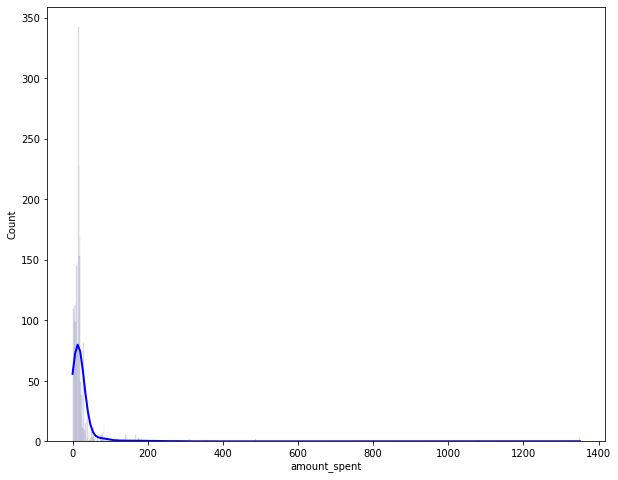

In [51]:

orders_spain = orders[orders.Country == 'Spain']
sns.histplot(
        data = orders_spain,
        x = 'amount_spent',
        kde = True, 
        color = 'blue', 
        line_kws = {"linewidth": 2}, 
        alpha = 0.1)


#### Select all orders made in the month of August

In [53]:
orders_aug = orders[orders.month == 8]
orders_aug


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [56]:
orders[orders.month == 8].groupby(["Country"]).count().InvoiceNo

Country
Australia            107
Austria               88
Belgium              194
Canada                 5
Channel Islands      140
Denmark               16
EIRE                 593
Finland               61
France               569
Germany              795
Iceland               22
Israel               171
Italy                 95
Malta                 55
Netherlands          280
Norway                77
Poland                17
Portugal              41
Spain                252
Sweden                40
Switzerland          267
United Kingdom     23105
Unspecified           23
Name: InvoiceNo, dtype: int64

#### What's the  average amount of money spent by country

In [55]:
orders.groupby(["Country"]).mean().amount_spent

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [63]:
orders.groupby(["Description"]).max().sort_values(by=['UnitPrice'], ascending=False).head(1)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
Description,,,,,,,,,,,,,
postage,541768,581578,POST,2011,12,7,19,21,2011-12-09 12:16:00,8142.75,17935,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [65]:
orders.groupby(["year"]).mean().amount_spent

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64